# Regressão Linear - Predição da Idade. Para este exemplo executa o notebook "1-tratando_dados_ausentes" sem preencher a idade.

### importar bibliotecas

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Vou pegar os dados originais
data = pd.read_csv('titanic3_idade.csv')

In [69]:
data.head()

,classe,sobreviveu,nome,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [70]:
#Vericar se a idade está nula
data.isnull().sum()

classe              0
sobreviveu          0
nome                0
sexo                0
idade             263
irmaos_conjuge      0
pais_filhos         0
bilhete             0
tarifa              0
embarque            0
dtype: int64

### Definir o Id do Passageiro como Index

In [71]:
#Eu preciso do passenger id para fazer a inputação de dados
#Se não tiver eu tenho que criar um
data.index.names = ['passenger_id']

In [72]:
data.head()

,classe,sobreviveu,nome,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
passenger_id,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [73]:
#Se o passenger_id não estiver como índice, deixar
#data.set_index('passenger_id', inplace=True)

In [74]:
data.head()

,classe,sobreviveu,nome,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
passenger_id,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### Conferir shape novamente

In [75]:
data.shape

(1309, 10)

### Traduzir colunas

In [76]:
data.columns

Index(['classe', 'sobreviveu', 'nome', 'sexo', 'idade', 'irmaos_conjuge',
       'pais_filhos', 'bilhete', 'tarifa', 'embarque'],
      dtype='object')

In [77]:
data.head()

,classe,sobreviveu,nome,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
passenger_id,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### Traduzir Sexo

In [78]:
data['sexo'] = data['sexo'].map({'male':'homem', 'female': 'mulher'})

In [79]:
data['sexo'].head()

passenger_id
0    mulher
1     homem
2    mulher
3     homem
4    mulher
Name: sexo, dtype: object

### Averiguar dados nulos

In [80]:
data.isnull().sum()

classe              0
sobreviveu          0
nome                0
sexo                0
idade             263
irmaos_conjuge      0
pais_filhos         0
bilhete             0
tarifa              0
embarque            0
dtype: int64

### Verificar correlações, pois temos que ver quais campos tem alguma relação com idade

In [81]:
data.corr()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
classe,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558668
sobreviveu,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244397
idade,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.177590
irmaos_conjuge,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160339
pais_filhos,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221626
tarifa,-0.558668,0.244397,0.177590,0.160339,0.221626,1.000000


### Visualizar correlações com "heatmap"

<AxesSubplot:>

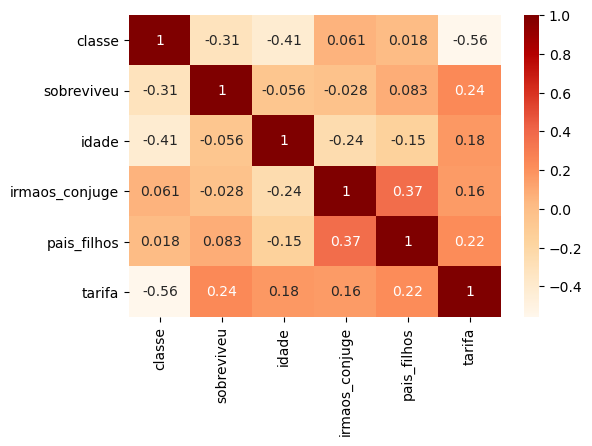

In [82]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [83]:
data.drop('sobreviveu', axis=1, inplace=True)

### Checar dados nulos

In [84]:
data.isnull().sum()

classe              0
nome                0
sexo                0
idade             263
irmaos_conjuge      0
pais_filhos         0
bilhete             0
tarifa              0
embarque            0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [85]:
data['titulo'] = data['nome'].str.extract('([a-zA-Z]+)\.')

In [86]:
data['titulo'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

### Precisamos entender o título para agrupar os principais 

In [87]:
pd.crosstab(data['titulo'], data['sexo'])

sexo,homem,mulher
titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


### Vamos agrupar os principais títulos 

In [88]:
data['titulo'] = data['titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [89]:
pd.crosstab(data['titulo'], data['sexo'])

sexo,homem,mulher
titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

### Tenho que ver o que faz, ver o vídeo

In [90]:
data.loc[data['titulo']=='Master'].mean()

classe             2.655738
idade              5.482704
irmaos_conjuge     2.049180
pais_filhos        1.377049
tarifa            36.008195
dtype: float64

In [91]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada'
}

In [92]:
data['titulo'] = data['titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   classe          1309 non-null   int64  
 1   nome            1309 non-null   object 
 2   sexo            1309 non-null   object 
 3   idade           1046 non-null   float64
 4   irmaos_conjuge  1309 non-null   int64  
 5   pais_filhos     1309 non-null   int64  
 6   bilhete         1309 non-null   object 
 7   tarifa          1309 non-null   float64
 8   embarque        1309 non-null   object 
 9   titulo          1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


### Remover "Bilhete" e "Nome"

In [94]:
data.drop(['bilhete','nome'], axis=1, inplace=True)

In [95]:
data.head()

,classe,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,titulo
passenger_id,,,,,,,,
0,1,mulher,29.0000,0,0,211.3375,S,Solteira
1,1,homem,0.9167,1,2,151.5500,S,Menino
2,1,mulher,2.0000,1,2,151.5500,S,Solteira
3,1,homem,30.0000,1,2,151.5500,S,HomemAdulto
4,1,mulher,25.0000,1,2,151.5500,S,Casada


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [97]:
solteiras_com_pais = data.loc[(data['titulo']=='Solteira') & (data['pais_filhos']>=1)]
solteiras_com_pais.head()

,classe,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,titulo
passenger_id,,,,,,,,
2,1,mulher,2.0,1,2,151.5500,S,Solteira
36,1,mulher,22.0,0,1,55.0000,S,Solteira
55,1,mulher,14.0,1,2,120.0000,S,Solteira
76,1,mulher,39.0,1,1,83.1583,C,Solteira
82,1,mulher,36.0,0,2,71.0000,S,Solteira


### Idade média de "meninas solteiras acompanhadas dos pais"

In [98]:
solteiras_com_pais['idade'].mean()

12.178728947368421

### Verificar distribuição da idade

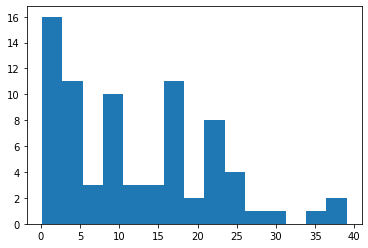

In [101]:
ax = plt.hist(solteiras_com_pais['idade'], bins=15)
plt.show()

### Média de mulheres "solteiras"

In [102]:
data.loc[data['titulo']=='Solteira']['idade'].mean()

21.774206666666668

### Distribuição das idades de mulheres "solteiras"

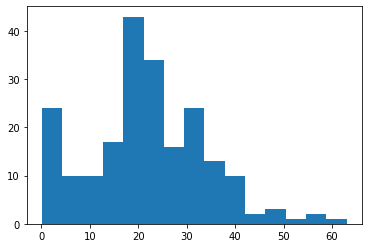

In [103]:
plt.hist(data.loc[data['titulo']=='Solteira']['idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [104]:
data.loc[data['titulo']=='Casada']['idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

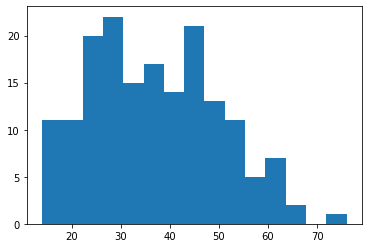

In [105]:
plt.hist(data.loc[data['titulo']=='Casada']['idade'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"

In [106]:
solteiras_com_pais.index

Int64Index([   2,   36,   55,   76,   82,  111,  112,  113,  122,  130,  159,
             187,  193,  216,  220,  250,  251,  289,  309,  340,  341,  350,
             370,  377,  395,  430,  434,  437,  438,  445,  446,  478,  479,
             501,  533,  540,  541,  558,  588,  590,  591,  623,  624,  625,
             626,  627,  628,  643,  657,  658,  659,  665,  679,  682,  738,
             763,  806,  807,  828,  829,  866,  895,  901,  916,  934,  937,
             955,  956,  957, 1048, 1098, 1099, 1112, 1122, 1156, 1172, 1173,
            1174, 1175, 1187, 1189, 1208, 1209, 1230, 1257, 1265],
           dtype='int64', name='passenger_id')

In [107]:
data['solteira_com_pais'] = 0

In [108]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
        data['solteira_com_pais'].at[idx] = 1

In [109]:
data.loc[data['solteira_com_pais']==1]['idade'].mean()

12.178728947368421

In [110]:
data.loc[data['solteira_com_pais']==0]['idade'].mean()

31.26812711340206

### Transformar recursos categóricos em "dummies"

In [111]:
data.head()

,classe,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,titulo,solteira_com_pais
passenger_id,,,,,,,,,
0,1,mulher,29.0000,0,0,211.3375,S,Solteira,0
1,1,homem,0.9167,1,2,151.5500,S,Menino,0
2,1,mulher,2.0000,1,2,151.5500,S,Solteira,1
3,1,homem,30.0000,1,2,151.5500,S,HomemAdulto,0
4,1,mulher,25.0000,1,2,151.5500,S,Casada,0


In [112]:
data['sexo'] = data['sexo'].map({'homem':0, 'mulher':1})

In [113]:
data.head()

,classe,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,titulo,solteira_com_pais
passenger_id,,,,,,,,,
0,1,1,29.0000,0,0,211.3375,S,Solteira,0
1,1,0,0.9167,1,2,151.5500,S,Menino,0
2,1,1,2.0000,1,2,151.5500,S,Solteira,1
3,1,0,30.0000,1,2,151.5500,S,HomemAdulto,0
4,1,1,25.0000,1,2,151.5500,S,Casada,0


In [114]:
data = pd.get_dummies(data, columns=['classe', 'embarque', 'titulo'], drop_first=True)

In [115]:
data.shape

(1309, 13)

In [117]:
data.head()

,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,solteira_com_pais,classe_2,classe_3,embarque_Q,embarque_S,titulo_HomemAdulto,titulo_Menino,titulo_Solteira
passenger_id,,,,,,,,,,,,,
0,1,29.0000,0,0,211.3375,0,0,0,0,1,0,0,1
1,0,0.9167,1,2,151.5500,0,0,0,0,1,0,1,0
2,1,2.0000,1,2,151.5500,1,0,0,0,1,0,0,1
3,0,30.0000,1,2,151.5500,0,0,0,0,1,1,0,0
4,1,25.0000,1,2,151.5500,0,0,0,0,1,0,0,0


### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [126]:
data.isnull().sum()

sexo                    0
idade                 263
irmaos_conjuge          0
pais_filhos             0
tarifa                  0
solteira_com_pais       0
classe_2                0
classe_3                0
embarque_Q              0
embarque_S              0
titulo_HomemAdulto      0
titulo_Menino           0
titulo_Solteira         0
dtype: int64

In [127]:
#Como não tem nada nullo vai todos os campos.
train_idade = data.dropna()

In [128]:
train_idade

,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,solteira_com_pais,classe_2,classe_3,embarque_Q,embarque_S,titulo_HomemAdulto,titulo_Menino,titulo_Solteira
passenger_id,,,,,,,,,,,,,
0,1,29.0000,0,0,211.3375,0,0,0,0,1,0,0,1
1,0,0.9167,1,2,151.5500,0,0,0,0,1,0,1,0
2,1,2.0000,1,2,151.5500,1,0,0,0,1,0,0,1
3,0,30.0000,1,2,151.5500,0,0,0,0,1,1,0,0
4,1,25.0000,1,2,151.5500,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,0,0,1,0,0,1,0,0
1304,1,14.5000,1,0,14.4542,0,0,1,0,0,0,0,1
1306,0,26.5000,0,0,7.2250,0,0,1,0,0,1,0,0


In [129]:
#Aqui vai sair a idade
test_idade = data.loc[data['idade'].isnull()].drop('idade', axis=1)

In [130]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [131]:
X = train_idade.drop('idade', axis=1)

In [132]:
y = train_idade['idade']

In [133]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [134]:
from sklearn import linear_model

### Instanciar modelo

In [135]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [136]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [138]:
X_train.shape,y_train.shape

((732, 12), (732,))

In [139]:
lm.fit(X_train, y_train)

LinearRegression()

In [140]:
 X_test.shape, y_test.shape

((314, 12), (314,))

### Fazer predição

In [141]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [142]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [143]:
lm.score(X_test, y_test)

0.40701109232733734

### Averiguar rmse

In [144]:
mse = mean_squared_error(y_test, pred)

In [145]:
rmse = np.sqrt(mse)
rmse

11.10642113216937

### Visualizar resíduos em scatterplot

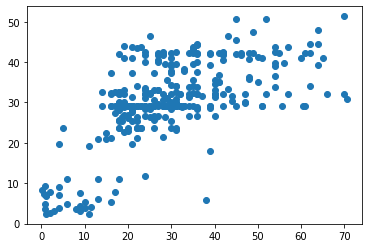

In [146]:
plt.scatter(y_test, pred)
plt.show()

### Aplicar modelo nos dados nulos

In [147]:
test_idade.shape

(263, 12)

In [148]:
pred_idade = lm.predict(test_idade)

In [149]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [150]:
test_idade['idade'] = pred_idade

In [151]:
test_idade.isnull().sum()

sexo                  0
irmaos_conjuge        0
pais_filhos           0
tarifa                0
solteira_com_pais     0
classe_2              0
classe_3              0
embarque_Q            0
embarque_S            0
titulo_HomemAdulto    0
titulo_Menino         0
titulo_Solteira       0
idade                 0
dtype: int64

### Averiguar shapes

In [152]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [153]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [154]:
idade.isnull().sum()

sexo                  0
idade                 0
irmaos_conjuge        0
pais_filhos           0
tarifa                0
solteira_com_pais     0
classe_2              0
classe_3              0
embarque_Q            0
embarque_S            0
titulo_HomemAdulto    0
titulo_Menino         0
titulo_Solteira       0
dtype: int64

In [155]:
idade.shape

(1309, 13)

In [156]:
idade_completa = pd.DataFrame({'passenger_id': idade.index, 'idade': idade['idade']})

### Salvar CSV com idade completa

In [157]:
idade_completa.to_csv('idade_completa.csv', index=False)

In [158]:
data_idade = pd.read_csv('idade_completa.csv')

In [161]:
data_idade.shape

(1309, 2)

In [162]:
data_idade.head()

,passenger_id,idade
0,0,29.0000
1,1,0.9167
2,2,2.0000
3,3,30.0000
4,4,25.0000
